## Student Performance Analysis
This notebook contains the analysis of a dataset on student performance, addressing several business questions and hypotheses.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
file_path = "C:\Dataset\StudentsPerformance.csv"
students_data = pd.read_csv(file_path)
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Check for missing values in the dataset
missing_values = students_data.isnull().sum()

missing_values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# Check the data types of each column
data_types = students_data.dtypes

data_types


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Data Cleaning and Preparation
Columns have been renamed for consistency, and the data types have been verified.

In [5]:
students_data.columns = students_data.columns.str.replace(" ", "_").str.lower()
students_data.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Outlier Analysis
This section analyzes the outliers in math and writing scores.

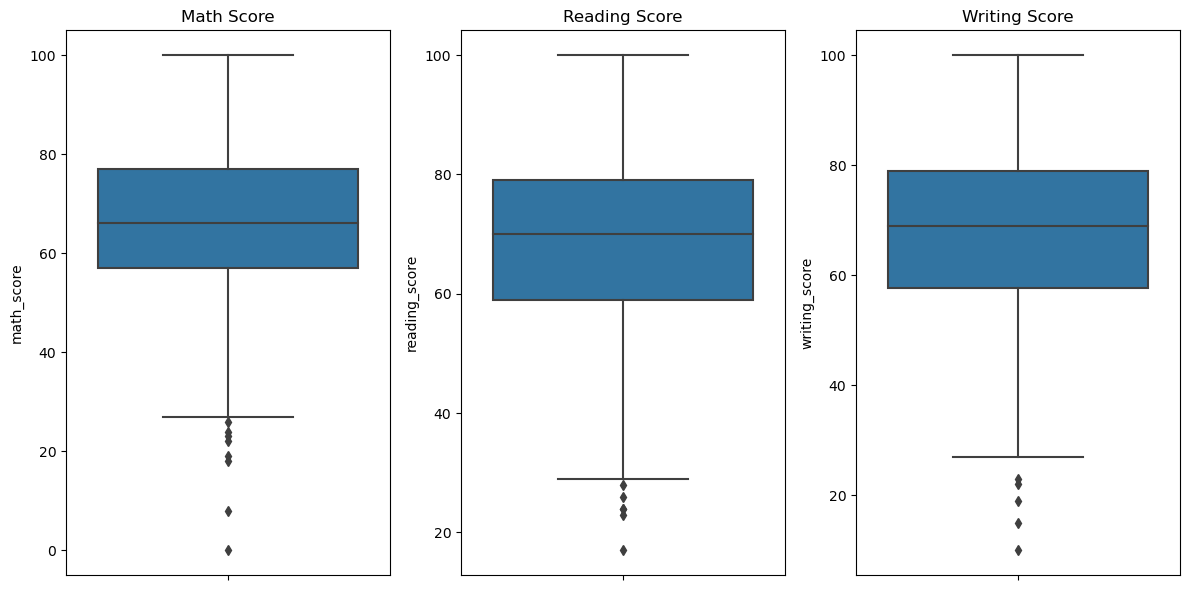

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting boxplots for the score columns to visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=students_data["math_score"])
plt.title("Math Score")

plt.subplot(1, 3, 2)
sns.boxplot(y=students_data["reading_score"])
plt.title("Reading Score")

plt.subplot(1, 3, 3)
sns.boxplot(y=students_data["writing_score"])
plt.title("Writing Score")

plt.tight_layout()
plt.show()

#### Insights
- There are a few outliers in the lower end of the math and writing scores.
- These outliers could indicate students who faced challenges or had exceptional circumstances affecting their performance.

### Investigating Outliers

In [8]:
# Identifying outlier thresholds using 1.5*IQR rule
math_score_stats = students_data["math_score"].describe()
Q1_math = math_score_stats["25%"]
Q3_math = math_score_stats["75%"]
IQR_math = Q3_math - Q1_math
outlier_threshold_math = Q1_math - 1.5 * IQR_math

writing_score_stats = students_data["writing_score"].describe()
Q1_writing = writing_score_stats["25%"]
Q3_writing = writing_score_stats["75%"]
IQR_writing = Q3_writing - Q1_writing
outlier_threshold_writing = Q1_writing - 1.5 * IQR_writing

# Extracting outlier records for math and writing scores
math_outliers = students_data[students_data["math_score"] < outlier_threshold_math]
writing_outliers = students_data[students_data["writing_score"] < outlier_threshold_writing]

math_outliers, writing_outliers

(     gender race/ethnicity parental_level_of_education         lunch  \
 17   female        group B            some high school  free/reduced   
 59   female        group C            some high school  free/reduced   
 145  female        group C                some college  free/reduced   
 338  female        group B            some high school  free/reduced   
 466  female        group D          associate's degree  free/reduced   
 787  female        group B                some college      standard   
 842  female        group B                 high school  free/reduced   
 980  female        group B                 high school  free/reduced   
 
     test_preparation_course  math_score  reading_score  writing_score  
 17                     none          18             32             28  
 59                     none           0             17             10  
 145                    none          22             39             33  
 338                    none          24         

#### Insights from Outlier Investigation
- Most of the outliers are in the math and writing scores, particularly on the lower end.
- These outliers may reflect students with different learning challenges or environmental factors.
- Further investigation into these cases could provide insights into the specific challenges faced by these students.

#### Descriptive Statistics

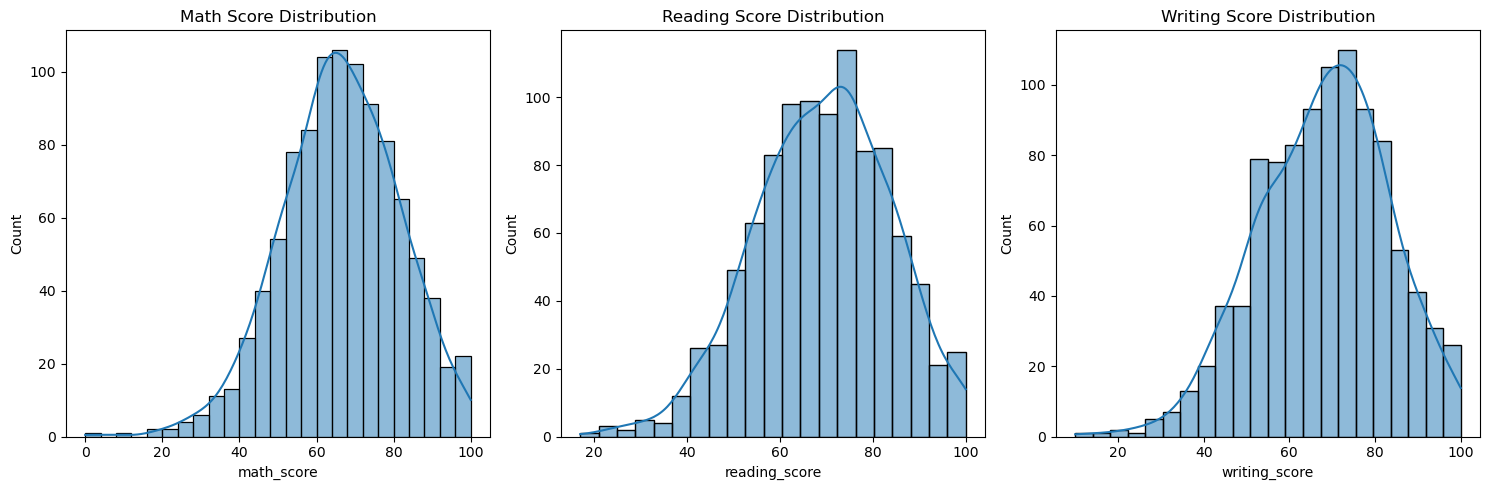

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
# Descriptive statistics for math, reading, and writing scores
score_stats = students_data[['math_score', 'reading_score', 'writing_score']].describe()

# Plotting histograms for the scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(students_data['math_score'], kde=True)
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(students_data['reading_score'], kde=True)
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(students_data['writing_score'], kde=True)
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

score_stats


Distributions:
    
Math Score: The distribution shows a wide range, with a slight skew towards lower scores.
    
Reading Score: This distribution is more centered, with fewer low outliers compared to math scores.
    
Writing Score: Similar to reading scores, the writing score distribution is relatively centered with a few low outliers.
    
Insights:
    
- Reading Scores are, on average, slightly higher than writing and math scores.

- Math Scores have the widest range, including the lowest minimum score, indicating more variability in performance.

- The distributions of all three subjects are relatively normal, with slight deviations due to the outliers.

### Analysis by Gender
This section analyzes the average scores in math, reading, and writing based on gender.

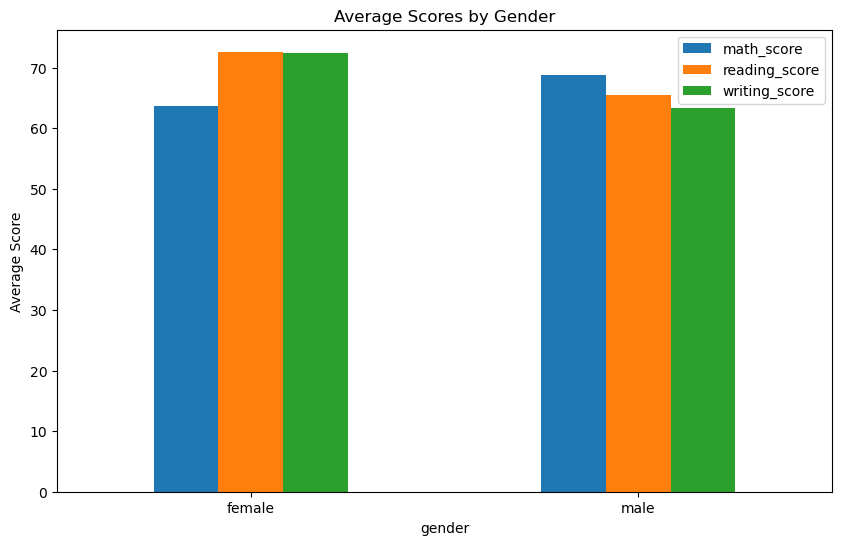

In [6]:
average_scores_by_gender = students_data.groupby("gender")[["math_score", "reading_score", "writing_score"]].mean()
average_scores_by_gender.plot(kind="bar", figsize=(10, 6))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

#### Insights
- Male students have a higher average in math scores.
- Female students outperform male students in both reading and writing scores.

### Analysis by Race/Ethnicity
This section examines how average scores in the three subjects vary across different race/ethnicity groups.

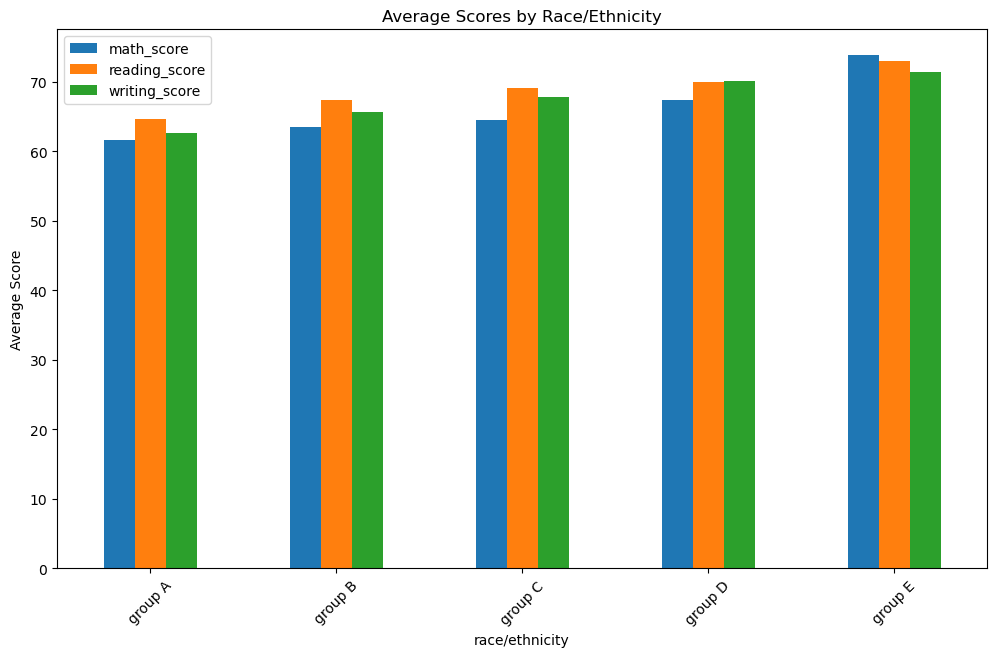

In [9]:
average_scores_by_race = students_data.groupby("race/ethnicity")[["math_score", "reading_score", "writing_score"]].mean()
average_scores_by_race.plot(kind="bar", figsize=(12, 7))
plt.title("Average Scores by Race/Ethnicity")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

#### Insights
- Group E shows the highest average scores across all subjects.
- There is a progressive increase in average scores from Group A to Group E.

### Analysis by Parental Level of Education
This analysis investigates the impact of parental education levels on student scores.

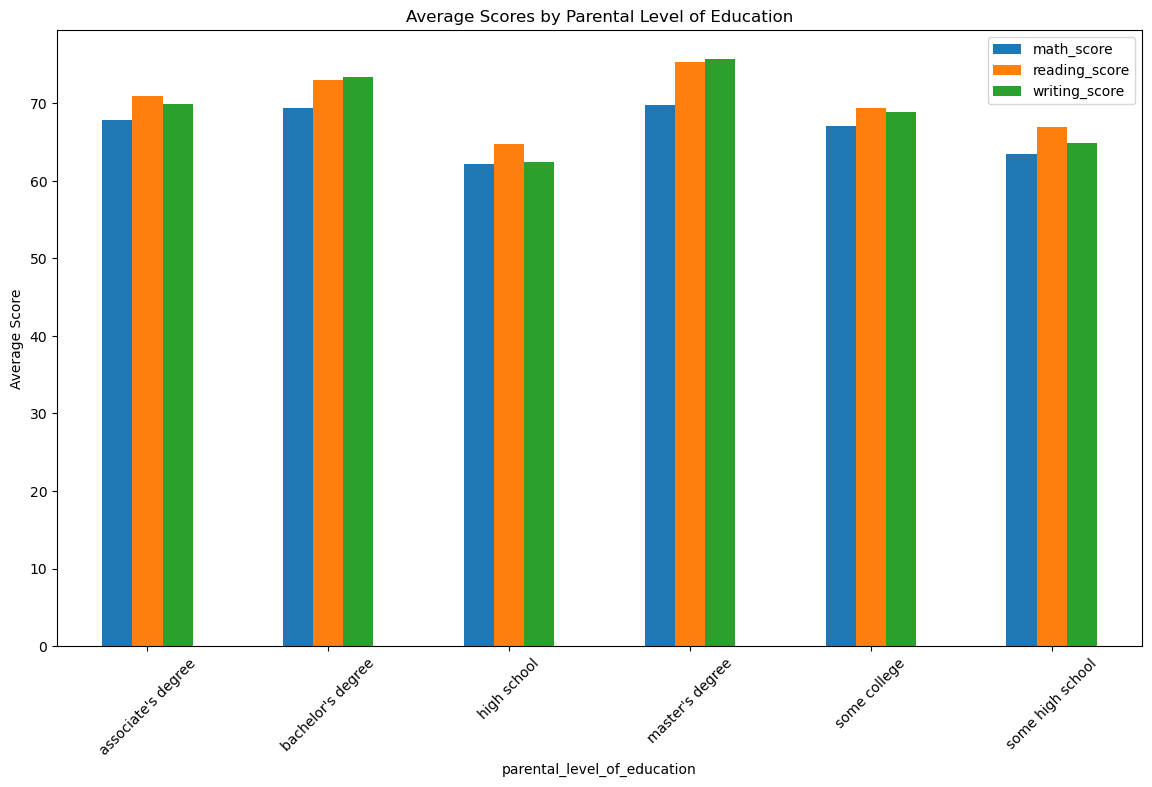

In [10]:
average_scores_by_parental_education = students_data.groupby("parental_level_of_education")[["math_score", "reading_score", "writing_score"]].mean()
average_scores_by_parental_education.plot(kind="bar", figsize=(14, 8))
plt.title("Average Scores by Parental Level of Education")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

#### Insights
- Students with parents who have a master's or bachelor's degree tend to have higher scores.
- There is a general trend of increasing scores with higher parental education levels.

### Analysis by Lunch Type
This section explores the relationship between the type of lunch students receive and their academic performance.

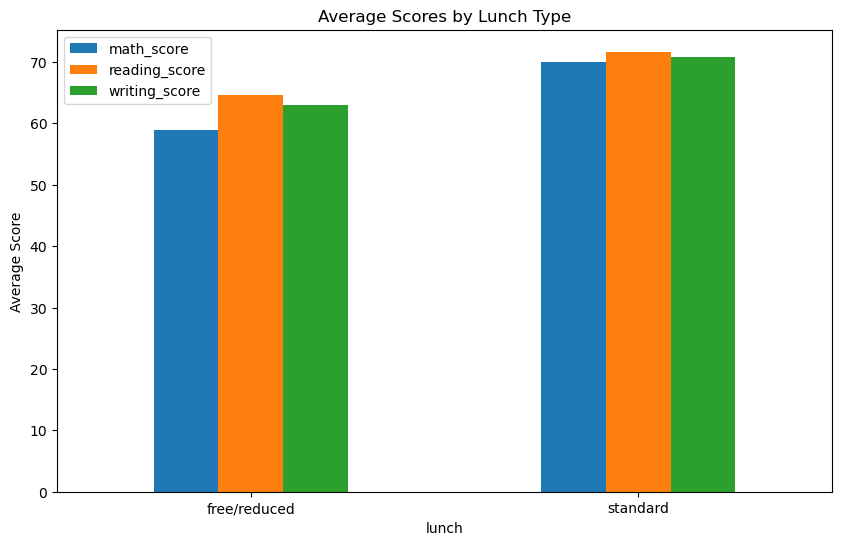

In [11]:
average_scores_by_lunch = students_data.groupby("lunch")[["math_score", "reading_score", "writing_score"]].mean()
average_scores_by_lunch.plot(kind="bar", figsize=(10, 6))
plt.title("Average Scores by Lunch Type")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

#### Insights
- Students receiving standard lunch have higher average scores.
- The type of lunch might be an indicator of socio-economic status.

### Analysis by Test Preparation Course
This analysis checks if completing a test preparation course affects student scores.

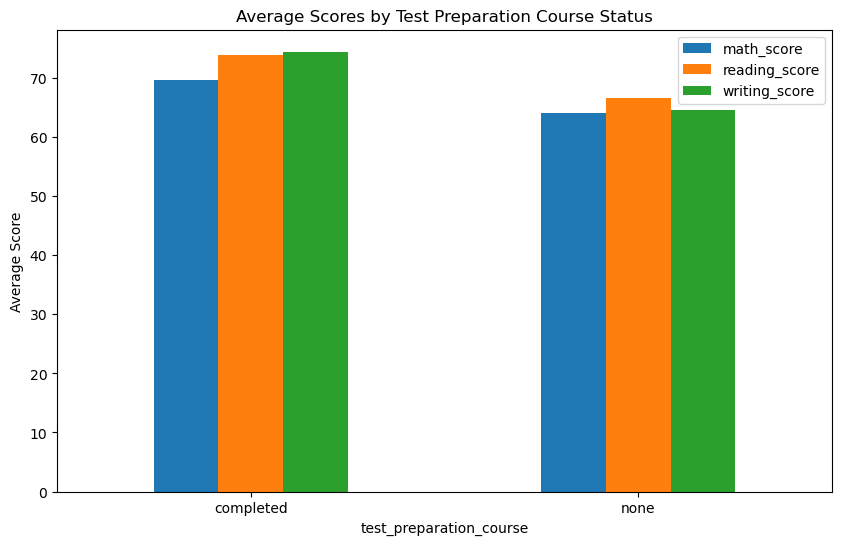

In [12]:
average_scores_by_test_prep = students_data.groupby("test_preparation_course")[["math_score", "reading_score", "writing_score"]].mean()
average_scores_by_test_prep.plot(kind="bar", figsize=(10, 6))
plt.title("Average Scores by Test Preparation Course Status")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

#### Insights
- Completing a test preparation course is associated with higher scores in all subjects.
- The effect is more pronounced in reading and writing scores.

### Hypothesis Testing
#### Hypothesis 1: Test Preparation Course Effectiveness

In [14]:
from scipy.stats import ttest_ind

group_prep_completed = students_data[students_data["test_preparation_course"] == "completed"]
group_no_prep = students_data[students_data["test_preparation_course"] == "none"]

# T-tests for math, reading, and writing scores
ttest_results_math = ttest_ind(group_prep_completed["math_score"], group_no_prep["math_score"])
ttest_results_reading = ttest_ind(group_prep_completed["reading_score"], group_no_prep["reading_score"])
ttest_results_writing = ttest_ind(group_prep_completed["writing_score"], group_no_prep["writing_score"])

ttest_results_math, ttest_results_reading, ttest_results_writing

(Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08),
 Ttest_indResult(statistic=7.871663538941468, pvalue=9.081783336892205e-15),
 Ttest_indResult(statistic=10.409173436808748, pvalue=3.68529173524572e-24))

#### Insights
- There is a statistically significant difference in scores between students who completed a test preparation course and those who did not, across all subjects.
- This supports the hypothesis that test preparation courses have a positive impact on student scores.

Interpretation:
    
The p-values for all three tests (math, reading, and writing) are significantly lower than the typical alpha level of 0.05. 
This indicates that there is a statistically significant difference in scores between students 
who completed a test preparation course and those who did not, across all subjects.

Conclusion for Hypothesis 1: 

We can conclude that students who completed a test preparation course have significantly higher scores in math, reading, and writing compared to those who did not, supporting our hypothesis.

Next, let's conduct ANOVA to test the hypothesis regarding the parental level of education. 

#### Hypothesis 2: Parental Education Level Influence

In [ ]:
# ANOVA for comparing scores across parental education levels
groups_parental_education = [students_data[students_data["parental_level_of_education"] == level]["math_score"] for level in students_data["parental_level_of_education"].unique()]
anova_results_math = f_oneway(*groups_parental_education)
groups_parental_education_reading = [students_data[students_data["parental_level_of_education"] == level]["reading_score"] for level in students_data["parental_level_of_education"].unique()]
groups_parental_education_writing = [students_data[students_data["parental_level_of_education"] == level]["writing_score"] for level in students_data["parental_level_of_education"].unique()]
anova_results_reading = f_oneway(*groups_parental_education_reading)
anova_results_writing = f_oneway(*groups_parental_education_writing)

anova_results_math, anova_results_reading, anova_results_writing

#### Insights
- Statistically significant differences in scores are evident across different levels of parental education for all three subjects.
- This supports the hypothesis that parental education levels significantly affect student academic performance.

Interpretation:
    
The p-values for the ANOVA tests across math, reading, and writing are all well below the typical alpha level of 0.05. 

This indicates that there are statistically significant differences in scores across different levels of parental education for all three subjects.

Conclusion for Hypothesis 2: 
    
The hypothesis that there is a significant difference in academic performance based on the parental level of education is supported by these results.

Finally, we'll conduct t-tests to compare the average scores based on lunch type (standard vs. free/reduced) for our third hypothesis. Let's proceed with that.

#### Hypothesis 3: Lunch Type Impact on Scores

In [ ]:
group_standard_lunch = students_data[students_data["lunch"] == "standard"]
group_free_reduced_lunch = students_data[students_data["lunch"] == "free/reduced"]

# T-tests for scores based on lunch type
ttest_results_lunch_math = ttest_ind(group_standard_lunch["math_score"], group_free_reduced_lunch["math_score"])
ttest_results_lunch_reading = ttest_ind(group_standard_lunch["reading_score"], group_free_reduced_lunch["reading_score"])
ttest_results_lunch_writing = ttest_ind(group_standard_lunch["writing_score"], group_free_reduced_lunch["writing_score"])

ttest_results_lunch_math, ttest_results_lunch_reading, ttest_results_lunch_writing

#### Insights
- The type of lunch (standard vs. free/reduced) significantly affects student academic performance, with those receiving standard lunch scoring higher.
- This suggests a correlation between lunch type, potentially reflecting socio-economic status, and academic performance.

Interpretation:

The p-values for the t-tests across all three subjects (math, reading, and writing) are significantly lower than the conventional alpha level of 0.05. This indicates that there is a statistically significant difference in scores between students receiving standard lunch and those receiving free or reduced lunch.

Conclusion for Hypothesis 3: 

The hypothesis that the type of lunch (standard vs. free/reduced) significantly affects student academic performance is supported by these results. This suggests a correlation between lunch type, potentially reflecting socio-economic status, and academic performance.